<a href="https://colab.research.google.com/github/Soyasauce-53/OutriX_Tasks/blob/main/Handwritten_Digit_Reconition_Using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Installing OpenCV & Importing TensorFlow**

In [1]:
!pip install opencv-python

In [2]:
import tensorflow as tf

**Loading MNIST Dataset**

In [3]:
mnist = tf.keras.datasets.mnist

**Divide Into Training & Testing Datasets**

In [4]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
X_train.shape

(60000, 28, 28)

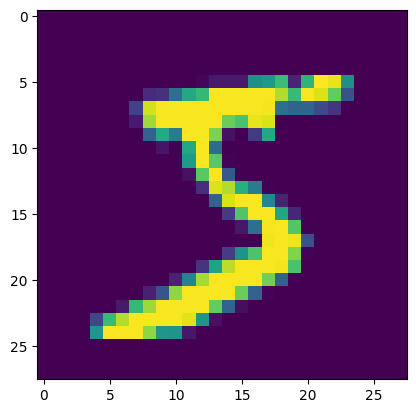

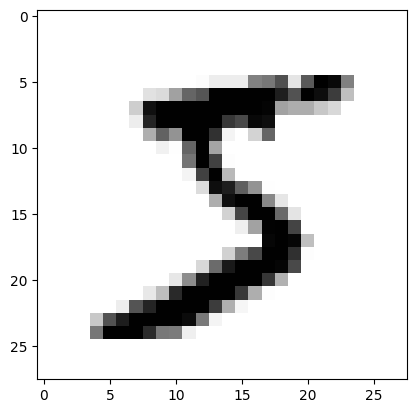

In [6]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])
plt.show()
plt.imshow(X_train[0], cmap=plt.cm.binary)

**Checking the Values of each Pixel**

In [7]:
print (X_train[0]) #Before Normalization

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

**Normalizing the Data**

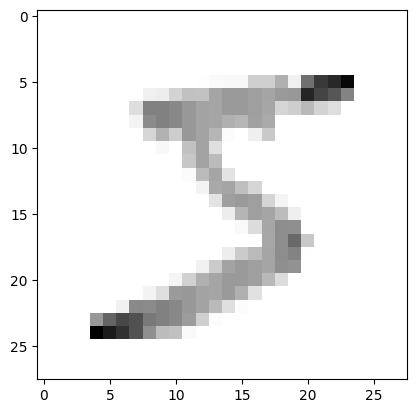

In [8]:
X_train = tf.keras.utils.normalize(X_train, axis = 1)
X_test = tf.keras.utils.normalize(X_test, axis = 1)
plt.imshow(X_train[0], cmap=plt.cm.binary)

In [9]:
print(X_train[0]) #After Normalization

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [10]:
print(Y_train[0])

5


**Resizing the Image**

In [11]:
import numpy as np
IMG_SIZE = 28
X_trainr = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X_testr = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print("Training Samples Dimension", X_trainr.shape)
print("Testing Samples Dimension", X_testr.shape)

Training Samples Dimension (60000, 28, 28, 1)
Testing Samples Dimension (10000, 28, 28, 1)


**Creating Deep Neural Network**

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [13]:
# Creating a Neural Network
model = Sequential()

# First Convolutional Layer 0 1 2 3
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# Second Convolutional Layer 0 1 2 3
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# Third Convolutional Layer 0 1 2 3
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# Fully Connected Layer 1
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

# Fully Connected Layer 2
model.add(Dense(32))
model.add(Activation("relu"))

# Last Fully Connected Layer
model.add(Dense(10))
model.add(Activation('softmax'))

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ ?                      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [15]:
print("Total Training Samples = ", len(X_trainr))

Total Training Samples =  60000


In [16]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**Model Training**

In [17]:
model.fit(X_trainr, Y_train, epochs=5, validation_split=0.3)

Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 67s 49ms/step - accuracy: 0.7881 - loss: 0.6442 - val_accuracy: 0.9528 - val_loss: 0.1533
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 81s 49ms/step - accuracy: 0.9626 - loss: 0.1204 - val_accuracy: 0.9733 - val_loss: 0.0907
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 83s 50ms/step - accuracy: 0.9758 - loss: 0.0795 - val_accuracy: 0.9761 - val_loss: 0.0773
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 81s 49ms/step - accuracy: 0.9820 - loss: 0.0601 - val_accuracy: 0.9793 - val_loss: 0.0694
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 82s 49ms/step - accuracy: 0.9867 - loss: 0.0440 - val_accuracy: 0.9763 - val_loss: 0.0811


In [18]:
# Evaluate Model

test_loss, test_acc = model.evaluate(X_testr, Y_test, verbose=0)
print(f"✅ Test Accuracy: {test_acc * 100:.2f}%")

✅ Test Accuracy: 97.90%


In [19]:
predictions = model.predict([X_testr])

 11/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=('Tensor(shape=(32, 28, 28, 1))',)
  warnings.warn(msg)


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=('Tensor(shape=(None, 28, 28, 1))',)
  warnings.warn(msg)


In [20]:
print(np.argmax(predictions[0]))

7


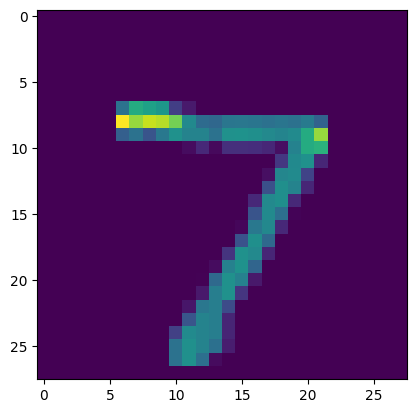

In [21]:
plt.imshow(X_test[0])


In [22]:
print(np.argmax(predictions[128]))

8


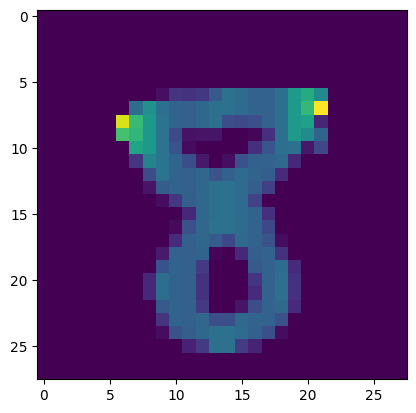

In [23]:
plt.imshow(X_test[128])

In [24]:
import cv2

In [33]:
img = cv2.imread('/content/7.png')

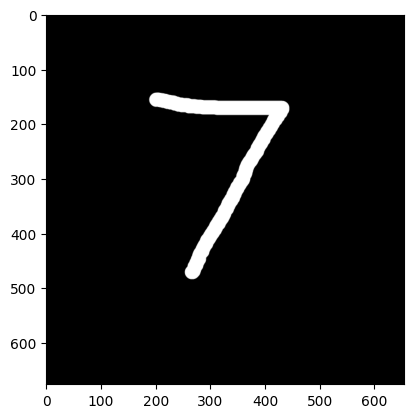

In [34]:
# Check if the image was loaded successfully
if img is not None:
    # Convert the image to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Display the grayscale image
    plt.imshow(gray_img, cmap='gray')
    plt.show()
else:
    print("Error: Could not load the image. Please check the file path and ensure it's a valid image file.")

In [37]:
gray_img.shape

(676, 654)

In [38]:
resized = cv2.resize(gray_img, (28,28), interpolation = cv2.INTER_AREA)

In [39]:
resized.shape

(28, 28)

In [40]:
newimg = tf.keras.utils.normalize(resized, axis = 1)

In [41]:
newimg = np.array(newimg).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [42]:
newimg.shape

(1, 28, 28, 1)

In [43]:
predictions = model.predict(newimg)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


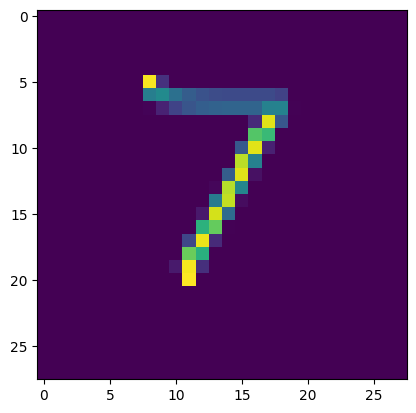

In [48]:
plt.imshow(newimg[0])

**Gradio Integration**

In [49]:
import gradio as gr
import cv2
import numpy as np

In [50]:
IMG_SIZE = 28

In [51]:
# Prediction function
def predict_digit(img):
    """
    Takes an input image (from canvas/upload), preprocesses it,
    and returns digit prediction probabilities.
    """
    # Resize to 28x28
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

    # Convert to grayscale if needed
    if img.ndim == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Normalize (same as training)
    img = tf.keras.utils.normalize(img, axis=1)

    # Reshape for CNN
    img = img.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

    # Predict
    pred = model.predict(img)

    # Return probabilities for each digit 0-9
    return {str(i): float(pred[0][i]) for i in range(10)}


In [52]:
# Create Gradio interface
digit_interface = gr.Interface(
    fn=predict_digit,
    inputs=gr.Image(width=200, height=200, image_mode="L"),  # canvas for drawing
    outputs=gr.Label(num_top_classes=3),
    title="✏️ MNIST Digit Classifier (Your CNN)",
    description="Draw a digit (0-9) in the box and the trained CNN model will predict it."
)

In [53]:
# Launch the UI
digit_interface.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://74de1eb9d24140befe.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
